### Introduction

Both of the challenges involve thorough understanding of the whole algorithm as well as the problem in hand. The first problem focuses on the computer vision aspect of AI and the second problen focuses on the NLP aspect, both of which are the core of any Machne Learning based application.

These are interesting problems to begin with because without an appropriate approach to these problems, the output would just be a bunch of numbers, with little or no value.

The first problem urges us to think beyond the problem and focus more on the process. A large run of epochs would obviously resuult in better training accuracy, but it's not an ideal way to deal with this problem as it is resource intensive to run large number of epochs and, most importanly, it's always prone to get overfit on the training data and tend to form strong relations in training data and hence starts to "remember" the training data. Such kind of models will most certainly perform poorly on the validaition and test set data, even if they seemed to perfomred very well on the training data.

#### SOTA:
The state of the art (SOTA) model used on the same dataset gives an accuracy of 99.74% [[source](https://paperswithcode.com/sota/fine-grained-image-classification-on-oxford)]. If we are careful with our approach, we shuld be able to achieve an accuracy close to this score since now we know it is possible to do so.

### Downloading the Dataset

To get the dataset in our colab environment, we are going to download it from the link provided. We are going to use the wget package to downaload the dataset file.

In [ ]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers.tgz

--2020-11-09 18:11:57--  https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.176.229
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.176.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 345236087 (329M) [application/x-tar]
Saving to: ‘oxford-102-flowers.tgz’

oxford-102-flowers. 100%[===================>] 329.24M  37.0MB/s    in 8.7s    

2020-11-09 18:12:06 (38.0 MB/s) - ‘oxford-102-flowers.tgz’ saved [345236087/345236087]



#### Extracting data

We're first making a directory called 'data' to store the downloaded data.

Then we change the current working directory using the %cd magic command

Using the 'tar' package, we will extract the data from the downnloaded dataset and store the images in the file system of colab environment.

And finally, after the extraction of data, we will delete the downloaded tgz file to save memory

In [ ]:
!mkdir '/content/data'
%cd data
!tar -zxvf /content/oxford-102-flowers.tgz
!rm -rf /content/oxford-102-flowers.tgz

Streaming output truncated to the last 5000 lines.
oxford-102-flowers/jpg/image_07634.jpg
oxford-102-flowers/jpg/image_01310.jpg
oxford-102-flowers/jpg/image_03097.jpg
oxford-102-flowers/jpg/image_05968.jpg
oxford-102-flowers/jpg/image_00448.jpg
oxford-102-flowers/jpg/image_07792.jpg
oxford-102-flowers/jpg/image_07265.jpg
oxford-102-flowers/jpg/image_03343.jpg
oxford-102-flowers/jpg/image_00210.jpg
oxford-102-flowers/jpg/image_03833.jpg
oxford-102-flowers/jpg/image_03993.jpg
oxford-102-flowers/jpg/image_02316.jpg
oxford-102-flowers/jpg/image_02991.jpg
oxford-102-flowers/jpg/image_06135.jpg
oxford-102-flowers/jpg/image_05413.jpg
oxford-102-flowers/jpg/image_04386.jpg
oxford-102-flowers/jpg/image_01073.jpg
oxford-102-flowers/jpg/image_06546.jpg
oxford-102-flowers/jpg/image_01521.jpg
oxford-102-flowers/jpg/image_03887.jpg
oxford-102-flowers/jpg/image_00149.jpg
oxford-102-flowers/jpg/image_00921.jpg
oxford-102-flowers/jpg/image_02386.jpg
oxford-102-flowers/jpg/image_03815.jpg
oxford-102-fl

### Importing libraries

A bit about each library is as follows:
1. torch: contain all the PyTorch impelemenatation of various kinds of neural networks and other related thinigs
2. numpy: It's an array manipluation library which supports n-dimentional arrays and provides very handy high-level mathematical functions
3. torchvision: The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision
4. matplotlib: It's a library to create and display visualizations
5. time, os, copy: These are utility libraries for certain operations as we will see below

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

Now, to make sure we leverage the performance of GPUs, we are preparing a variable called 'device' to make the future computations on the GPU instead of the CPU

In [ ]:
#Testing if we have access to GPU, for faster processing
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

### Loading Dataset in memory

The dataset contains 102 categories of flowers. Each class consists of between 40 and 258 images.

We are provided with three files namely 'train.txt', 'valid.txt' and 'test.txt' containing the names of train, validation and test set images along with their respective categories

To load the datasets, it becomes convenient to have the train, validation and test data in their own seperate folders, so that they can then be loaded into the memory with the help of PyTorch's dataset sub-package.

In [ ]:
data_dir = '/content/data/oxford-102-flowers/'
files = ['train.txt','test.txt','valid.txt']

for i in files:
  with open(data_dir + i) as myfile:
    for line in myfile:
      curr = i.split('.')[0]
      l = line.split()
      src = os.path.join(data_dir + l[0])

      dir = os.path.join(data_dir + curr)
      if not os.path.isdir(dir):
        os.mkdir(dir)
      
      sub_dir = os.path.join(dir + '/' + l[1])
      if not os.path.isdir(sub_dir):
        os.mkdir(sub_dir)

      print("Copying {} to the folder {}".format(src, sub_dir))
      os.system('cp "%s" "%s"' % (src, sub_dir))

Streaming output truncated to the last 5000 lines.
Copying /content/data/oxford-102-flowers/jpg/image_00374.jpg to the folder /content/data/oxford-102-flowers/test/72
Copying /content/data/oxford-102-flowers/jpg/image_07912.jpg to the folder /content/data/oxford-102-flowers/test/99
Copying /content/data/oxford-102-flowers/jpg/image_05887.jpg to the folder /content/data/oxford-102-flowers/test/62
Copying /content/data/oxford-102-flowers/jpg/image_05570.jpg to the folder /content/data/oxford-102-flowers/test/65
Copying /content/data/oxford-102-flowers/jpg/image_03671.jpg to the folder /content/data/oxford-102-flowers/test/52
Copying /content/data/oxford-102-flowers/jpg/image_05043.jpg to the folder /content/data/oxford-102-flowers/test/58
Copying /content/data/oxford-102-flowers/jpg/image_00239.jpg to the folder /content/data/oxford-102-flowers/test/76
Copying /content/data/oxford-102-flowers/jpg/image_01353.jpg to the folder /content/data/oxford-102-flowers/test/50
Copying /content/data

Now, let's finally load the data in memory

In [ ]:
#Converting PIL images to Tensors for processing
#Random cropping is used to make all the input image size of constant size
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor()
    ]),
    'valid': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor()
    ]),
    'test': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor()
    ])
}

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                                          for x in ['train', 'valid', 'test']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4)
              for x in ['train', 'valid']}

In [ ]:
#Seperating out Testset because shuffle needs to be False
testset = image_datasets['test']
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

Let's see if the images are in place. We should see 1020 images in each of the 'train' and 'valid' subfolders

In [ ]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}

print(dataset_sizes)

{'train': 1020, 'valid': 1020}


As expected, we have the train and valid datasets in place, as required.

We can also see all the flower categories that we have

In [ ]:
class_names = image_datasets['train'].classes

### Visualizing sample images

Now, let's take random sample of data and visualize it

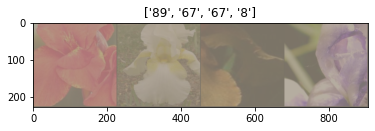

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

### Training the Model

We are required to use a pre-trained model of ResNet 50 with atmost 10 epochs.

Let's first build some general functions to train the model

*Directly borrowed from [here](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)*

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate/validation mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

Visualizing the model *predictions*

Generic function to display predictions for a few images

*Directly borrowed from [here](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)*

In [ ]:
def visualize_model(model, num_images=6, dataloaders=dataloaders['valid']):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

#### Finetuning the model

*Directly borrowed from [here](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)*

In [ ]:
model_ft = models.resnet50(pretrained=True)
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Training and evaluating the model

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
train Loss: 4.5633 Acc: 0.0471
valid Loss: 3.3736 Acc: 0.2598

Epoch 1/9
----------
train Loss: 3.3867 Acc: 0.2137
valid Loss: 2.1932 Acc: 0.4431

Epoch 2/9
----------
train Loss: 2.5378 Acc: 0.3961
valid Loss: 1.6162 Acc: 0.5618

Epoch 3/9
----------
train Loss: 1.9085 Acc: 0.5627
valid Loss: 1.0908 Acc: 0.7088

Epoch 4/9
----------
train Loss: 1.5474 Acc: 0.6275
valid Loss: 0.9304 Acc: 0.7392

Epoch 5/9
----------
train Loss: 1.2844 Acc: 0.7216
valid Loss: 0.8106 Acc: 0.8010

Epoch 6/9
----------
train Loss: 1.1177 Acc: 0.7382
valid Loss: 0.8207 Acc: 0.7882

Epoch 7/9
----------
train Loss: 0.7578 Acc: 0.8618
valid Loss: 0.6080 Acc: 0.8441

Epoch 8/9
----------
train Loss: 0.6906 Acc: 0.8735
valid Loss: 0.5751 Acc: 0.8559

Epoch 9/9
----------
train Loss: 0.6845 Acc: 0.8735
valid Loss: 0.5594 Acc: 0.8588

Training complete in 4m 3s
Best val Acc: 0.858824


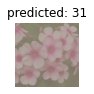

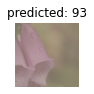

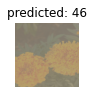

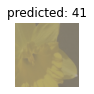

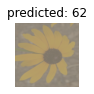

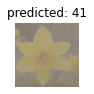

In [ ]:
visualize_model(model_ft)

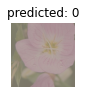

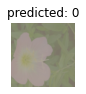

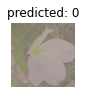

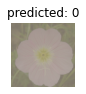

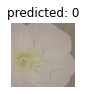

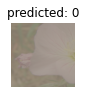

In [ ]:
visualize_model(model_ft, dataloaders=testloader)

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    #npimg = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

In [ ]:
def predict(model, top_num=5):
  dataiter = iter(testloader)
  images, labels = dataiter.next()
  images = images.to(device)
  labels = labels.to(device)

  outputs = model(images).to(device)

  _, predicted = torch.max(outputs, 1)

  print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


def predict(image_path, model, top_num=5):
  # Process image
  img = process_image(image_path)
  
  # Numpy -> Tensor
  image_tensor = torch.from_numpy(img).type(torch.FloatTensor)    # Add batch of size 1 to image
  model_input = image_tensor.unsqueeze(0)
  
  # Probs
  probs = torch.exp(model.forward(model_input))
  
  # Top probs
  top_probs, top_labs = probs.topk(top_num)
  top_probs = top_probs.detach().numpy().tolist()[0] 
  top_labs = top_labs.detach().numpy().tolist()[0]
  
  # Convert indices to classes
  idx_to_class = {val: key for key, val in    
                                    model.class_to_idx.items()}    top_labels = [idx_to_class[lab] for lab in top_labs]
  top_flowers = [label_map[idx_to_class[lab]] for lab in top_labs]    return top_probs, top_labels, top_flowers


In [ ]:
predict(model_ft)

GroundTruth:  tensor(80) tensor(80) tensor(80) tensor(80)


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7ffaa8d55c50>>
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7ffaa8d55c50>>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
  File "/usr/lib/python3.6/multiprocessing/process.py", line 1

Accuracy of the network on the 10000 test images: 83 %


### Disecting the results

Let's download GRADCAM

In [ ]:
!pip install pytorch-gradcam

In [ ]:
import gradcam as GradCAM

target_layer = model_ft.my_submodule
gradcam = GradCAM(model_ft, target_layer)

ModuleAttributeError: ignored